<a href="https://colab.research.google.com/github/Hena-123/095_HenaPatel/blob/main/Lab11/Lab11_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hena Patel**

---


**(CE095-18CEUOS114)**

# **LAB-11**

**AIM: Perform SVM with PCA operations on Iris dataset.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load datasets
from sklearn import datasets
iris=datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data,iris.target, random_state=95,test_size=0.25)

print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [4]:
from sklearn import svm,decomposition
pca=decomposition.PCA(n_components=2,whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [5]:
print(pca.components_.shape)

(2, 4)


In [6]:
#apply dimensionality reduction on X_train and X_test
pca_X_train=pca.transform(X_train)
pca_X_test=pca.transform(X_test)
print(pca_X_train.shape)
print(pca_X_test.shape)


(112, 2)
(38, 2)


In [8]:
from sklearn import svm
clf = svm.SVC(C=3.,gamma=0.005, random_state=95)
clf.fit(pca_X_train, Y_train)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=95, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
y_pred=clf.predict(pca_X_test)
print(y_pred)

[1 2 1 0 0 2 1 1 0 1 0 1 0 2 1 2 1 1 1 1 1 2 1 0 0 0 1 1 0 1 1 1 1 2 2 2 1
 0]


In [10]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred,average='weighted'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred,average='weighted'))

Accuracy: 0.8157894736842105
Precision: 0.880263157894737
Recall: 0.8157894736842105


In [11]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.65      1.00      0.79        13
           2       1.00      0.53      0.70        15

    accuracy                           0.82        38
   macro avg       0.88      0.84      0.83        38
weighted avg       0.88      0.82      0.81        38



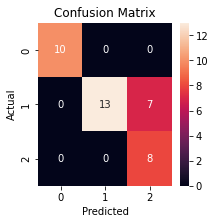

In [12]:
import seaborn as sb
cf_mat=metrics.confusion_matrix(y_pred, Y_test)
plt.subplots(figsize=(3, 3))
sb.heatmap(cf_mat, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()